# Stellar Classification Dataset





C:\Users\chira\AppData\Local\Temp\ipykernel_16780\3031472662.py:10: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\chira\Downloads\archive (17)\StarClassificationDataset.csv")  # Replace with actual path if needed


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     11887
           1       0.99      1.00      0.99      4319
           2       0.96      0.93      0.95      3792

    accuracy                           0.98     19998
   macro avg       0.98      0.97      0.97     19998
weighted avg       0.98      0.98      0.98     19998



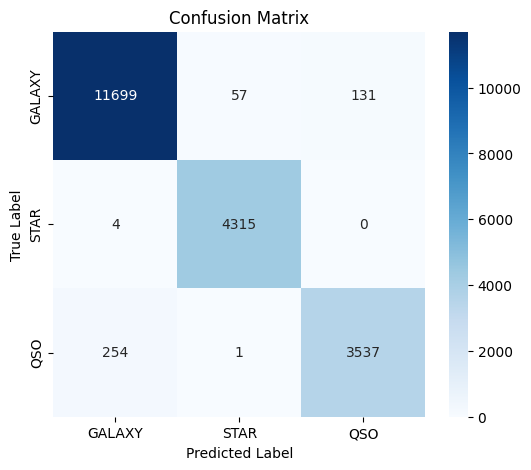

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv(r"C:\Users\chira\Downloads\archive (17)\StarClassificationDataset.csv")  # Replace with actual path if needed

# Clean the data
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)  # Replace empty strings with NaN
df.dropna(inplace=True)  # Drop rows with NaN values

# Selecting features and target
X = df.drop(columns=["object_ID", "spec_obj_ID", "class"])  # Removing non-informative IDs
y = df["class"]

# Encode target variable
y = y.map({"GALAXY": 0, "STAR": 1, "QSO": 2})  # Encoding classes as numerical values

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train a RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["GALAXY", "STAR", "QSO"], yticklabels=["GALAXY", "STAR", "QSO"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# California Housing Prices

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
url = r"C:\Users\chira\Downloads\archive (18)\housing.csv"
df = pd.read_csv(url)

# Handle missing values in 'total_bedrooms'
df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)

# Apply Sturge’s Rule for stratification on 'median_income'
num_bins = int(1 + np.log2(len(df)))  # Sturge's formula
df["income_cat"] = pd.cut(df["median_income"], bins=num_bins, labels=False)

# Stratified splitting
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(df, df["income_cat"]):
    train_set = df.loc[train_idx].drop("income_cat", axis=1)
    test_set = df.loc[test_idx].drop("income_cat", axis=1)

# Separate features and target
X_train = train_set.drop("median_house_value", axis=1)
y_train = train_set["median_house_value"]
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"]

# Identify numerical and categorical columns
num_features = X_train.select_dtypes(include=["float64", "int64"]).columns.tolist()
num_features.remove("longitude")
num_features.remove("latitude")
cat_features = ["ocean_proximity"]

# Build preprocessing pipeline
num_pipeline = Pipeline([("scaler", StandardScaler())])
cat_pipeline = Pipeline([("encoder", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

# Train Ridge and Lasso models
models = {"Ridge": Ridge(alpha=1.0), "Lasso": Lasso(alpha=0.1)}
results = {}

for name, model in models.items():
    pipe = Pipeline([("preprocessor", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Compute metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results)
print(results_df)

             Ridge         Lasso
MAE   4.957169e+04  4.956169e+04
MSE   4.638232e+09  4.637517e+09
RMSE  6.810457e+04  6.809931e+04


c:\Users\chira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.657e+12, tolerance: 2.208e+10
  model = cd_fast.enet_coordinate_descent(
